<a href="https://colab.research.google.com/github/ifrahkhan22/IndiaRx-Insights-EDA-of-250K-Indian-Pharmaceutical-Products/blob/main/PharmaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,product_id,brand_name,manufacturer,price_inr,is_discontinued,dosage_form,pack_size,pack_unit,num_active_ingredients,primary_ingredient,primary_strength,active_ingredients,therapeutic_class,packaging_raw,manufacturer_raw
0,1,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,223.42,False,tablet,10.0,strip,2,Amoxycillin,500mg,"[{'name': 'Amoxycillin', 'strength': '500mg', ...",antibiotic,strip of 10 tablets,Glaxo SmithKline Pharmaceuticals Ltd
1,2,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,132.36,False,tablet,5.0,strip,1,Azithromycin,500mg,"[{'name': 'Azithromycin', 'strength': '500mg',...",antibiotic,strip of 5 tablets,Alembic Pharmaceuticals Ltd
2,3,Ascoril LS Syrup,Glenmark Pharmaceuticals Ltd,118.00,False,syrup,100.0,bottle,2,Ambroxol,30mg/5ml,"[{'name': 'Ambroxol', 'strength': '30mg/5ml', ...",bronchodilator,bottle of 100 ml Syrup,Glenmark Pharmaceuticals Ltd
3,4,Allegra 120mg Tablet,Sanofi India Ltd,218.81,False,tablet,10.0,strip,1,Fexofenadine,120mg,"[{'name': 'Fexofenadine', 'strength': '120mg',...",antihistamine,strip of 10 tablets,Sanofi India Ltd
4,5,Avil 25 Tablet,Sanofi India Ltd,10.96,False,tablet,15.0,strip,1,Pheniramine,25mg,"[{'name': 'Pheniramine', 'strength': '25mg', '...",other,strip of 15 tablets,Sanofi India Ltd


,product_id,price_inr,pack_size,num_active_ingredients
count,253973.000000,253973.000000,231643.000000,253973.000000
mean,126987.000000,270.530844,18.988871,1.441893
std,73315.834296,3029.584134,36.717320,0.496795
min,1.000000,0.000000,1.000000,1.000000
25%,63494.000000,48.000000,10.000000,1.000000
50%,126987.000000,79.000000,10.000000,1.000000
75%,190480.000000,140.000000,10.000000,2.000000
max,253973.000000,436000.000000,5000.000000,5.000000


                        brand_name  num_active_ingredients  is_combo
0         Augmentin 625 Duo Tablet                       2      True
1              Azithral 500 Tablet                       1     False
2                 Ascoril LS Syrup                       2      True
3             Allegra 120mg Tablet                       1     False
4                   Avil 25 Tablet                       1     False
5                 Allegra-M Tablet                       2      True
6             Amoxyclav 625 Tablet                       2      True
7                  Azee 500 Tablet                       1     False
8               Atarax 25mg Tablet                       1     False
9  Ascoril D Plus Syrup Sugar Free                       2      True
           price_inr  price_per_unit
count  231639.000000   231639.000000
mean      214.678333       29.956671
std      2798.123564      495.667436
min         1.050000        0.007500
25%        46.500000        3.500000
50%        77.00000

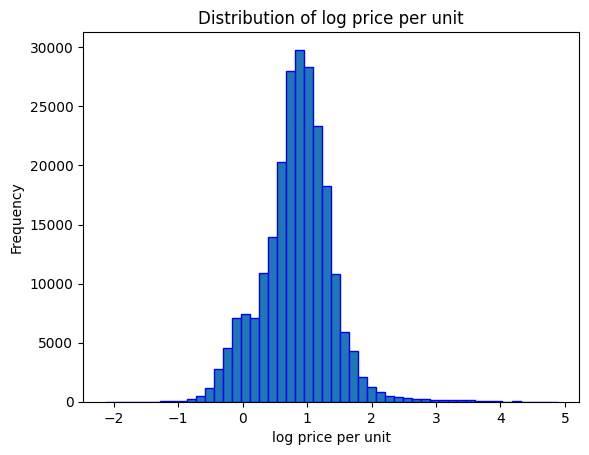

statistic = 12279.95490244293
pvalue = 0.0
df = (14.0, np.float64(727.89174916307))
df_num = 14.0
df_denom = 727.89174916307
nobs_t = 231639.0
n_groups = 15
means = [0.91272873 0.00212069 0.77881508 0.08863598 1.02458299 0.74770448
     0.2967446  0.93461894 1.52054433 0.87452407 1.25677156 0.65513913
     0.86323443 0.44694859 1.22692568]
nobs = [1.52421e+05 1.67350e+04 5.06600e+03 9.16500e+03 2.11340e+04 1.76000e+03
     3.79600e+03 3.30000e+01 1.22460e+04 5.26600e+03 2.87000e+02 1.67900e+03
     1.66400e+03 3.70000e+02 1.70000e+01]
vars_ = [0.16010901 0.09906481 0.10130861 0.13914474 0.15492439 0.54793081
     0.3890179  0.27294719 0.54358319 0.25519675 0.36230525 0.23186288
     0.18694695 0.27640421 0.22948902]
use_var = unequal
welch_correction = True
tuple = (np.float64(12279.95490244293), np.float64(0.0))
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
-----------------------------------------------------

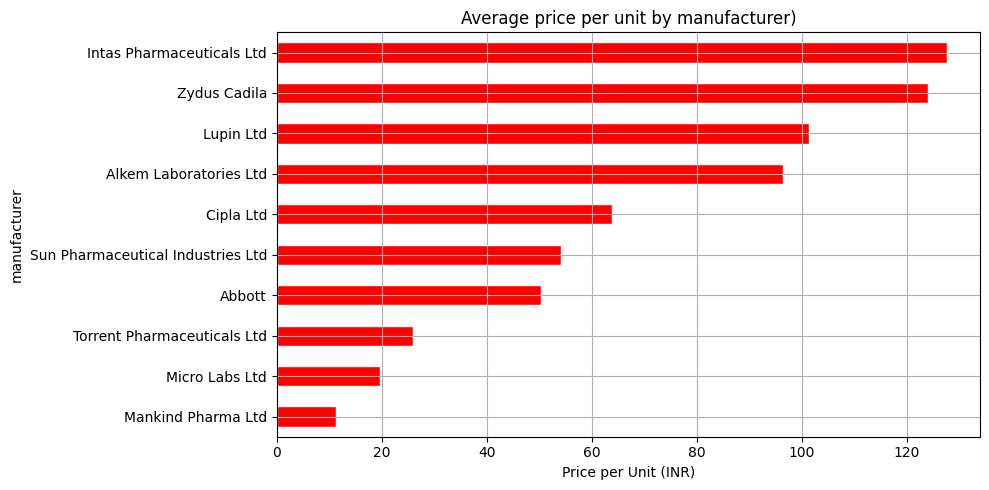

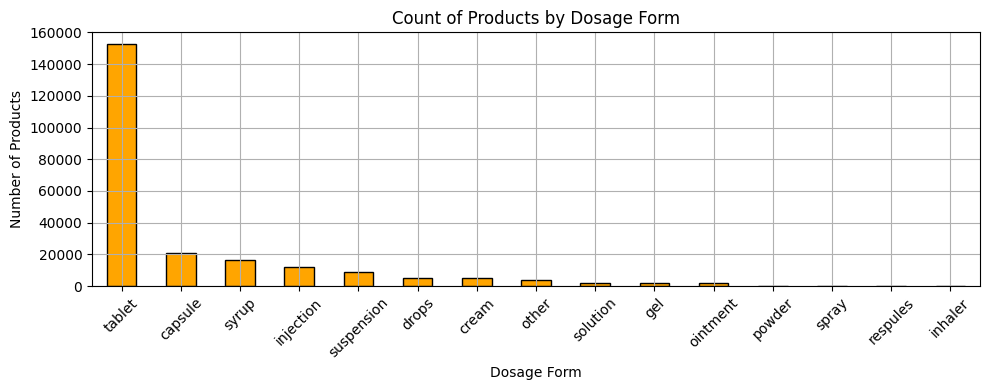

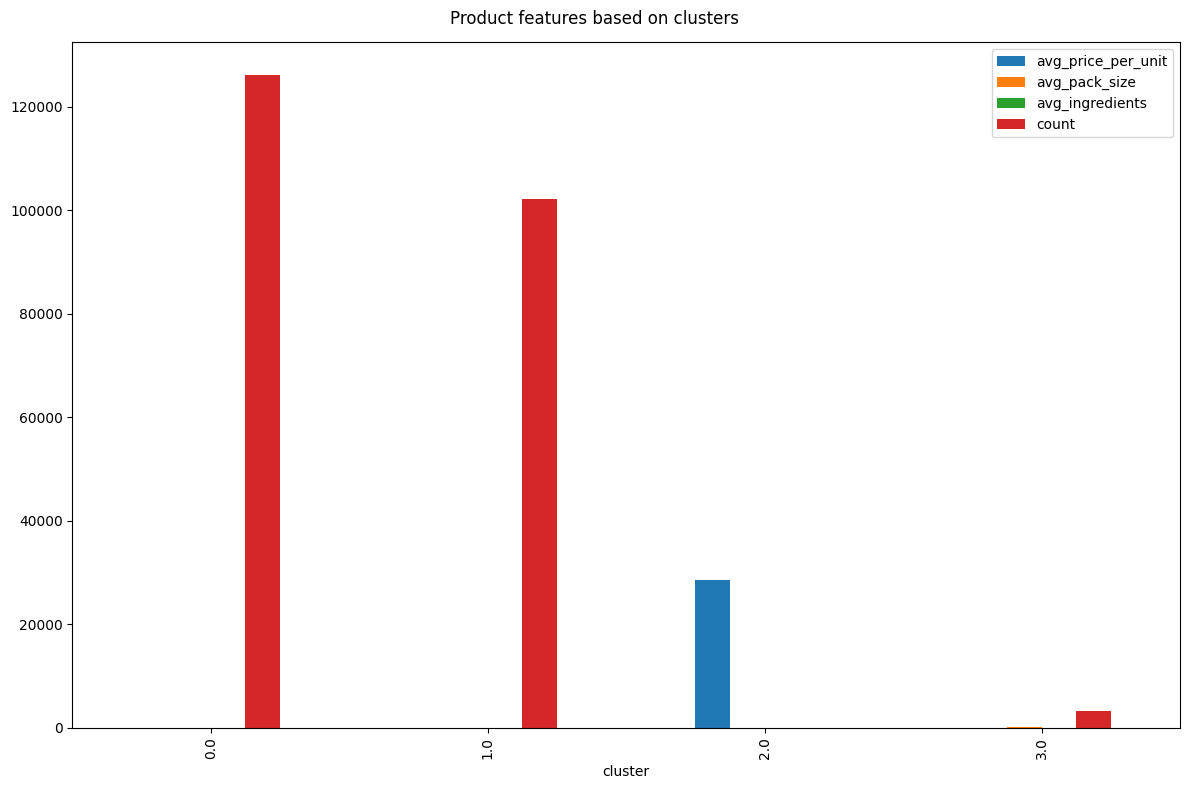

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.oneway import anova_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_excel("indian_pharmaceutical_products_clean.xlsx")
display(df.head())
display(df.describe())

#Required Data Cleaning
df = df.dropna(subset=["price_inr", "pack_size"])
df = df[df["pack_size"] > 0]  # remove zero pack sizes
df["price_per_unit"] = df["price_inr"] / df["pack_size"]
df = df[df["price_per_unit"] > 0]  # remove zero price/unit
df["logprice_per_unit"] = np.log10(df["price_per_unit"]) #for better statistical handling

df["is_combo"] = df["num_active_ingredients"] > 1 #create a new tag , is it a combo?
print(df[["brand_name", "num_active_ingredients", "is_combo"]].head(10))
print(df[["price_inr", "price_per_unit"]].describe())

#For understanding the distribution of log tranformed price per unit
plt.hist(df["logprice_per_unit"], bins=50, edgecolor='blue')
plt.title('Distribution of log price per unit')
plt.xlabel('log price per unit')
plt.ylabel('Frequency')
plt.show()
'''
#Boxplot for price by dosage form
df = df.dropna(subset = ['dosage_form'])
df.boxplot(column="log_price_per_unit", by="dosage_form", rot=90)
plt.title("Log Price per Unit by Dosage Form")
plt.suptitle("")
plt.ylabel("Log Price per Unit")
plt.grid(True)
plt.show()
'''
#ANOVA test
#To check if the average prices are really different between tablets, syrups , injections
groups = [df[df["dosage_form"] == form]["logprice_per_unit"].dropna()
          for form in df["dosage_form"].unique()]
anova_results = anova_oneway(groups, use_var="unequal")
print(anova_results)

#Tukey HSD Post-hoc Test (to check if ANOVA is significant)
#Finding where exactly they differ
if anova_results.pvalue < 0.05:
  tukey_result = pairwise_tukeyhsd(endog=df["logprice_per_unit"],
                                     groups=df["dosage_form"],
                                     alpha=0.05)
  print(tukey_result.summary())
else:
    print("No significant differences between groups (ANOVA p > 0.05)")

#Coefficient of Variation
coefv_table = (
    df.groupby(["primary_ingredient", "primary_strength"])
      .agg(count=("price_per_unit", "count"),
           mean_price=("price_per_unit", "mean"),
           std_price=("price_per_unit", "std"))
      .assign(cv=lambda d: d["std_price"] / d["mean_price"])
      .query("count >= 5")
      .sort_values("cv", ascending=False)
)
coefv_table.to_excel("high_cv_drugs.xlsx", index=True)


#Price anomalies detection using z-score
df["z_price"] = df.groupby(["primary_ingredient", "primary_strength"])["price_per_unit"]\
    .transform(lambda x: (x - x.mean()) / x.std(ddof=1) if len(x) > 1 else np.nan)
df["price_anomaly"] = df["z_price"].abs() > 2.5
df[df["price_anomaly"]].to_excel("price_anomalies.xlsx", index=False)


#Clustering with k-means
features = df[["price_per_unit", "pack_size", "num_active_ingredients"]].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
df.loc[features.index, "cluster"] = kmeans.fit_predict(scaled_features)

print(df[["brand_name", "price_per_unit", "pack_size", "num_active_ingredients", "cluster"]].dropna(subset=["cluster"]).head())
print(df["cluster"].value_counts())
print(df[df["cluster"].notna()][["brand_name", "cluster"]].head(10))

##Few insightful visualizations
#Price per unit manufacturer
top_mfg = df["manufacturer"].value_counts().nlargest(10).index
df_top_mfg = df[df["manufacturer"].isin(top_mfg)]
mfg_price = df_top_mfg.groupby("manufacturer")["price_per_unit"].mean().sort_values()

plt.figure(figsize=(10, 5))
mfg_price.plot(kind="barh", color="red", edgecolor="white")
plt.title("Average price per unit by manufacturer)")
plt.xlabel("Price per Unit (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Count of dosage forms
df["dosage_form"].value_counts().plot(kind="bar", color="orange", edgecolor="black", figsize=(10, 4))
plt.title("Count of Products by Dosage Form")
plt.ylabel("Number of Products")
plt.xlabel("Dosage Form")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

cluster_summary = (
    df.dropna(subset=["cluster"])
    .groupby("cluster")
    .agg(avg_price_per_unit=("price_per_unit", "mean"),
         avg_pack_size=("pack_size", "mean"),
         avg_ingredients=("num_active_ingredients", "mean"),
         count=("brand_name", "count"))
)

#Cluster wise average characteristics
cluster_summary.plot(kind="bar", layout=(2, 2), figsize=(12, 8))
plt.suptitle("Product features based on clusters")
plt.legend()
plt.tight_layout()
plt.show()

df.to_excel("pharma_enriched_clean.xlsx", index=False)